In [1]:
import pandas as pd

In [2]:
df_item=pd.read_csv("movies.dat", sep="::", header=None, names=["iid", "title", "genes"], encoding='latin-1')
df_item=df_item.dropna(axis='columns')
print(df_item)

       iid                               title                         genes
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
...    ...                                 ...                           ...
3878  3948             Meet the Parents (2000)                        Comedy
3879  3949          Requiem for a Dream (2000)                         Drama
3880  3950                    Tigerland (2000)                         Drama
3881  3951             Two Family House (2000)                         Drama
3882  3952               Contender, The (2000)                Drama|Thriller

[3883 rows x 3 columns]


/tmp/ipykernel_449187/1867190932.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_item=pd.read_csv("movies.dat", sep="::", header=None, names=["iid", "title", "genes"], encoding='latin-1')


In [3]:
categories = ['Action' ,'Adventure', 'Animation' ,"Children's" , 'Comedy' ,'Crime', 'Documentary', 'Drama' , 'Fantasy' ,
            'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,'Thriller', 'War', 'Western']

for category in categories:
    df_item[category] = df_item['genes'].apply(lambda x: 1 if category in x.split('|') else 0)

df_item = df_item.drop('genes', axis=1)

In [4]:
df_user = pd.read_csv("users.dat", sep="::", header=None, 
names=["uid", "gender", "age", "occupation","zip code"])
df_user

/tmp/ipykernel_449187/634168247.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv("users.dat", sep="::", header=None,


,uid,gender,age,occupation,zip code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
df_rating = pd.read_csv("ratings.dat", sep="::",header=None, 
names=['uid', 'iid', 'y',"timestamp"])
# df_rating=df_rating.drop(columns=['timestamp'])

/tmp/ipykernel_449187/1956484389.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rating = pd.read_csv("ratings.dat", sep="::",header=None,


In [6]:
df_all=pd.merge(df_rating, df_item, left_on='iid', right_on='iid')

In [7]:
columns = df_all.columns.tolist()

In [8]:
res = []
for column in columns[5:]:
    res.append((column, df_all[column].sum()))
sorted(res, key = lambda x: x[1], reverse=True)

[('Comedy', 356580),
 ('Drama', 354529),
 ('Action', 257457),
 ('Thriller', 189680),
 ('Sci-Fi', 157294),
 ('Romance', 147523),
 ('Adventure', 133953),
 ('Crime', 79541),
 ('Horror', 76386),
 ("Children's", 72186),
 ('War', 68527),
 ('Animation', 43293),
 ('Musical', 41533),
 ('Mystery', 40178),
 ('Fantasy', 36301),
 ('Western', 20683),
 ('Film-Noir', 18261),
 ('Documentary', 7910)]

In [9]:
df_all["clicked"]=df_all['y'].apply(lambda x: 1 if x>=3 else 0)

## divide groups based on age
* 若不是要跑age group setting，不要執行這段程式碼

In [13]:
df_user['binary_age'] = df_user['age'].apply(lambda x: 'M' if x<=1 or x>=45 else 'F')
df_user.rename(columns={'gender':'real_gender',"binary_age":"gender"}, inplace=True)
df_user

,uid,real_gender,age,occupation,zip code,gender
0,1,F,1,10,48067,M
1,2,M,56,16,70072,M
2,3,M,25,15,55117,F
3,4,M,45,7,02460,M
4,5,M,25,20,55455,F
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,F
6036,6037,F,45,1,76006,M
6037,6038,F,56,1,14706,M
6038,6039,F,45,0,01060,M


In [14]:
df_user.gender.value_counts()

gender
F    4392
M    1648
Name: count, dtype: int64

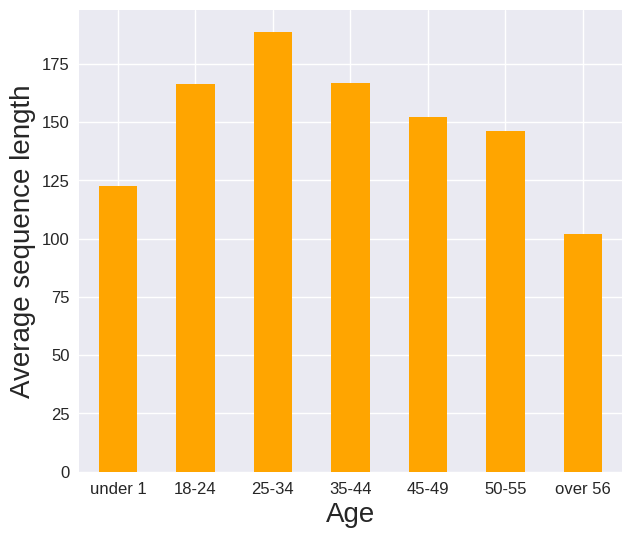

In [14]:
tmp = pd.merge(df_all,df_user, on='uid').groupby('uid')['iid'].count().reset_index()
tmp1 = pd.merge(tmp,df_user[['uid','age']], left_on='uid',right_on='uid').rename(columns={'iid':'sequence_length'})
tmp2 = tmp1.groupby('age')['sequence_length'].mean().reset_index()
ax = tmp2.plot(kind='bar',x='age',y='sequence_length',figsize=(7, 6),color = 'orange')
ax.set_ylabel('Average sequence length', size=20)
ax.set_xlabel('Age', size=20)
ax.tick_params(axis='x', labelsize=12,rotation= 0)
ax.tick_params(axis='y', labelsize=12)
custom_labels = ["under 1","18-24","25-34","35-44","45-49","50-55","over 56"]
ax.set_xticklabels(custom_labels, fontsize=12)
ax.legend().set_visible(False)
plt.show()

In [30]:
df_merge= pd.merge(df_all,df_user, on='uid')
df_merge[(df_merge['Drama']==0) & (df_merge['Sci-Fi']==1)].drop_duplicates('uid').groupby('age')['uid'].count().reset_index()
# df_merge = pd.merge(df_all,df_user, on='uid')
# tmp = df_merge[(df_merge['Drama']==0) & (df_merge['Sci-Fi']==1)].groupby('uid')['iid'].count().reset_index()
# tmp1 = pd.merge(tmp,df_user[['uid','age']], left_on='uid',right_on='uid').rename(columns={'iid':'sequence_length'})
# tmp2 = tmp1.groupby('age')['sequence_length'].mean().reset_index()
# tmp2

,age,uid
0,1,219
1,18,1076
2,25,2049
3,35,1149
4,45,529
5,50,467
6,56,340


## Generate domain A and B data

### 過濾 Domain (可以自己設定)
* based on number of items in domain
* item sequence length  

In [10]:
from pathlib import Path
import warnings
import pandas as pd

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
c = 0
selected = []

for i in range(len(categories)):
    for j in range(len(categories)):
        category1 = categories[i]
        category2 = categories[j]
        category2 = categories[j]
        category1 = "Sci-Fi"
        category2 = "Romance"
        if category1 == category2:
            continue
        domain_A = category1
        domain_B = category2
        folder_name = f"{domain_A.lower()}_{domain_B.lower()}"
        df_sourceA = df_all[(df_all[domain_A]==1) & (df_all[domain_B]==0)]
        df_sourceB = df_all[(df_all[domain_A]==0) & (df_all[domain_B]==1)] 

        df_sourceA = df_sourceA[['uid', 'iid', 'y', 'timestamp']]
        df_sourceB = df_sourceB[['uid', 'iid', 'y', 'timestamp']]
        df_sourceA_user = pd.merge(df_sourceA, df_user, left_on='uid', right_on='uid')
        df_sourceB_user = pd.merge(df_sourceB, df_user, left_on='uid', right_on='uid')

        df_sourceA_user = df_sourceA_user[['uid', 'iid', 'y', 'timestamp','gender']]
        df_sourceB_user = df_sourceB_user[['uid', 'iid', 'y', 'timestamp','gender']]
        
        df_sourceA_user['gender'] = df_sourceA_user['gender'].apply(lambda x: 1 if x=='M' else 0)
        df_sourceB_user['gender'] = df_sourceB_user['gender'].apply(lambda x: 1 if x=='M' else 0)

        df_sourceA_user['synthesis'] = 0
        df_sourceB_user['synthesis'] = 0

        domainA_avg_female_length = len(df_sourceA_user[df_sourceA_user['gender']==0])/len((df_sourceA_user[df_sourceA_user['gender']==0].uid.unique()))
        domainB_avg_female_length = len(df_sourceB_user[df_sourceB_user['gender']==0])/len((df_sourceB_user[df_sourceB_user['gender']==0].uid.unique()))
        domainA_avg_male_length = len(df_sourceA_user[df_sourceA_user['gender']==1])/len((df_sourceA_user[df_sourceA_user['gender']==1].uid.unique()))
        domainB_avg_male_length = len(df_sourceB_user[df_sourceB_user['gender']==1])/len((df_sourceB_user[df_sourceB_user['gender']==1].uid.unique()))
        inter_diff_A = domainA_avg_male_length - domainA_avg_female_length
        inter_diff_B = domainB_avg_male_length - domainB_avg_female_length 
        
        # 提取每个领域中的用户ID
        uids_sourceA = set(df_sourceA_user['uid'])
        uids_sourceB = set(df_sourceB_user['uid'])
        item_sourceA = len(set(df_sourceA_user['iid']))
        item_sourceB = len(set(df_sourceB_user['iid']))
        if df_sourceA_user['iid'].nunique()>=110 and df_sourceB_user['iid'].nunique()>=110:
            selected.append(folder_name)
            print("*"*50)
            print("Domain A: ", domain_A)
            print("Domain B: ", domain_B)
            print(f"领域A中的用户数量: {len(uids_sourceA)}")
            print(f"领域B中的用户数量: {len(uids_sourceB)}")
            print(f"领域A和领域B的交集: {len(uids_sourceA & uids_sourceB)}")
            print(f"领域A中的商品数量: {df_sourceA_user['iid'].nunique()}")
            print(f"领域B中的商品数量: {df_sourceB_user['iid'].nunique()}")
            print("Domain A average interaction number per user difference between male and female:", domainA_avg_male_length - domainA_avg_female_length)
            print("Domain B average interaction number per user difference between male and female:", domainB_avg_male_length - domainB_avg_female_length)
            print("*"*50)

**************************************************
Domain A:  Sci-Fi
Domain B:  Romance
领域A中的用户数量: 5877
领域B中的用户数量: 5881
领域A和领域B的交集: 5722
领域A中的商品数量: 267
领域B中的商品数量: 452
Domain A average interaction number per user difference between male and female: 13.283315912792773
Domain B average interaction number per user difference between male and female: -6.812018390236556
**************************************************
**************************************************
Domain A:  Sci-Fi
Domain B:  Romance
领域A中的用户数量: 5877
领域B中的用户数量: 5881
领域A和领域B的交集: 5722
领域A中的商品数量: 267
领域B中的商品数量: 452
Domain A average interaction number per user difference between male and female: 13.283315912792773
Domain B average interaction number per user difference between male and female: -6.812018390236556
**************************************************
**************************************************
Domain A:  Sci-Fi
Domain B:  Romance
领域A中的用户数量: 5877
领域B中的用户数量: 5881
领域A和领域B的交集: 5722
领域A中的商品数量: 267
领域B中的商品数量: 4

### 產生domain csv file

In [16]:
from pathlib import Path
selected  =["drama_sci-fi"]

for t in selected:
    data1, data2 = t.split("_")   
    if 'sci-fi' == data1:
        data1 = 'Sci-Fi' 
    if 'sci-fi' == data2:
        data2 = 'Sci-Fi'
    if 'film-noir' == data1:
        data1 = 'Film-Noir'
    if 'film-noir' == data2:
        data2 = 'Film-Noir'
    domain_A = data1.capitalize() if data1!="Sci-Fi" and data1!="Film-Noir" else data1
    domain_B = data2.capitalize() if data2!="Sci-Fi" and data2!="Film-Noir" else data2
    folder_name = f"{data1.lower()}_{data2.lower()}"

    df_sourceA = df_all[(df_all[domain_A]==1) & (df_all[domain_B]==0)] # 讓item都是nonoverlap的
    df_sourceB = df_all[(df_all[domain_A]==0) & (df_all[domain_B]==1)] 

    df_sourceA = df_sourceA[['uid', 'iid', 'y', 'timestamp']]
    df_sourceB = df_sourceB[['uid', 'iid', 'y', 'timestamp']]
    df_sourceA_user = pd.merge(df_sourceA, df_user, left_on='uid', right_on='uid')
    df_sourceB_user = pd.merge(df_sourceB, df_user, left_on='uid', right_on='uid')

    df_sourceA_user = df_sourceA_user[['uid', 'iid', 'y', 'timestamp','gender']]
    df_sourceB_user = df_sourceB_user[['uid', 'iid', 'y', 'timestamp','gender']]
    df_sourceA_user['gender'] = df_sourceA_user['gender'].apply(lambda x: 1 if x=='M' else 0)
    df_sourceB_user['gender'] = df_sourceB_user['gender'].apply(lambda x: 1 if x=='M' else 0)

    df_sourceA_user['synthesis'] = 0
    df_sourceB_user['synthesis'] = 0
    

    # 提取每个领域中的用户ID
    uids_sourceA = set(df_sourceA_user['uid'])
    uids_sourceB = set(df_sourceB_user['uid'])

    # 找出所有三个领域中都存在的用户ID
    overlap_uid1 = uids_sourceA.intersection(uids_sourceB)

    # 计算重叠用户的数量
    overlap_user1_count = len(overlap_uid1)
    print("*"*50)
    print("Domain A: ", domain_A)
    print("Domain B: ", domain_B)
    print(f"领域A中的用户数量: {len(uids_sourceA)}")
    print(f"领域B中的用户数量: {len(uids_sourceB)}")
    print(f"领域A和领域B的交集: {len(uids_sourceA & uids_sourceB)}")
    print(f"领域A中的商品数量: {df_sourceA_user['iid'].nunique()}")
    print(f"领域B中的商品数量: {df_sourceB_user['iid'].nunique()}")
    print("*"*50)
    print(folder_name)
    Path(f"../reverse_1and45age_dataset/{folder_name}").mkdir(parents=True, exist_ok=True)
    df_sourceA_user.to_csv(f"../reverse_1and45age_dataset/{folder_name}/"+ domain_A + '.csv',index=False)
    df_sourceB_user.to_csv(f"../reverse_1and45age_dataset/{folder_name}/"+ domain_B +'.csv',index=False)


**************************************************
Domain A:  Drama
Domain B:  Sci-Fi
领域A中的用户数量: 6028
领域B中的用户数量: 5829
领域A和领域B的交集: 5817
领域A中的商品数量: 1471
领域B中的商品数量: 252
**************************************************
drama_sci-fi
